In [1]:
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

# Data Exploration

In [2]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])

In [3]:
display(x.shape)
display(w.shape)
display(y.shape)

(4, 1)

(1, 1)

(4, 1)

In [4]:
display(x)
display(w)
display(bias)
display(y)

array([[1],
       [0],
       [1],
       [0]])

array([[1.2]])

0.5

array([[0],
       [1],
       [0],
       [1]])

In [5]:
yhat = x@w+bias
yhat

array([[1.7],
       [0.5],
       [1.7],
       [0.5]])

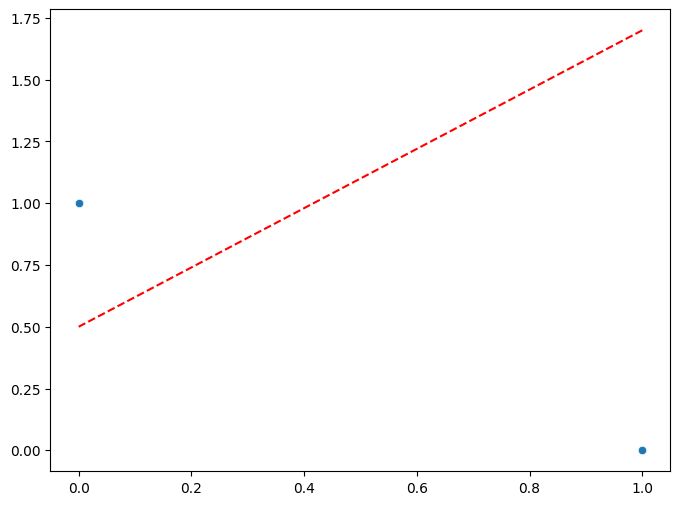

In [6]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

# Gradient Descent Code

In [7]:
def mse_loss_fxn(x, w, bias, y):
  yhat = x@w+bias
  if yhat.shape != y.shape:
    print('shape mismatch!')
  else:
    mse = np.sum((x @ w + bias - y)**2)/y.shape[0]
  return mse

In [8]:
def bias_derivative(x, w, bias, y):
  myderivative = np.sum(x @ w + bias - y)/y.shape[0] # x is a vector, w is a scalar and y is a vector
  return myderivative

In [9]:
def dependent_var_derivative(x, w, bias, y):
  if x.shape[1] == 1:
    if len(w.shape) != 2:
      w = w.reshape(-1,1)
    myderivative = np.sum(x.T @ (x @ w + bias - y))/y.shape[0] # x is a vector, w is a scalar and y is a vector
    return myderivative
  else:
    print('x should be a vector of shape m,1 but found',x.shape)

In [10]:
def gradient_descent_update_dep_var(x, w, bias, y, alpha):
  if len(w.shape) != 2:
      w = w.reshape(-1,1)
  w = w - alpha * (dependent_var_derivative(x, w, bias, y))
  return w
def gradient_descent_update_bias(x, w, bias, y, alpha):
  bias = bias - alpha * (bias_derivative(x, w, bias, y))
  return bias

# Testing our code

In [11]:
display(x)
display(w)
display(bias)
display(y)

array([[1],
       [0],
       [1],
       [0]])

array([[1.2]])

0.5

array([[0],
       [1],
       [0],
       [1]])

## 1st iteration

In [12]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5699999999999998


In [13]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

Our new w =  [[1.1915]]


In [14]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new bias =  0.4940425


In [15]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5485232555562498


## 2nd iter

In [16]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)

Our new w =  [[1.18307229]]


In [17]:
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new bias =  0.4881867135625


In [18]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5275297444031897


## 3rd iter

In [19]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new w =  [[1.17471599]]
Our new bias =  0.48243126646440154


In [20]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.5070072159046326


## 4th iter

In [33]:
w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
print('Our new w = ', w)
bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
print('Our new bias = ', bias)

Our new w =  [[1.1915]]
Our new bias =  0.4940425


In [22]:
print('MSE = ',mse_loss_fxn(x, w, bias, y))

MSE =  1.4869437361389235


## Let's loop it!

In [23]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, 0.01)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, 0.01)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

new w = [[1.15821423]]
new bias = 0.471215983339039
new MSE = 1.4673276796858534

new w = [[1.15006708]]
new bias = 0.46575348810647327
new MSE = 1.4481477216266692

new w = [[1.14198798]]
new bias = 0.4603860133404317
new MSE = 1.4293928297516472

new w = [[1.13397611]]
new bias = 0.455112272671809
new MSE = 1.4110522569698483

new w = [[1.12603067]]
new bias = 0.44993099661936536
new MSE = 1.3931155339158026

new w = [[1.11815086]]
new bias = 0.4448409323689903
new MSE = 1.375572461748021

new w = [[1.1103359]]
new bias = 0.4398408435558491
new MSE = 1.358413105134349

new w = [[1.10258501]]
new bias = 0.43492951004937547
new MSE = 1.3416277854193175

new w = [[1.09489744]]
new bias = 0.43010572774107236
new MSE = 1.325207073968771

new w = [[1.08727243]]
new bias = 0.4253683083350849
new MSE = 1.309141785687163

new w = [[1.07970922]]
new bias = 0.42071607914150855
new MSE = 1.2934229727030555

new w = [[1.0722071]]
new bias = 0.4161478828723976
new MSE = 1.278041918218436

new w = 

In [24]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.39679728],
       [0.38249355],
       [1.39679728],
       [0.38249355]])

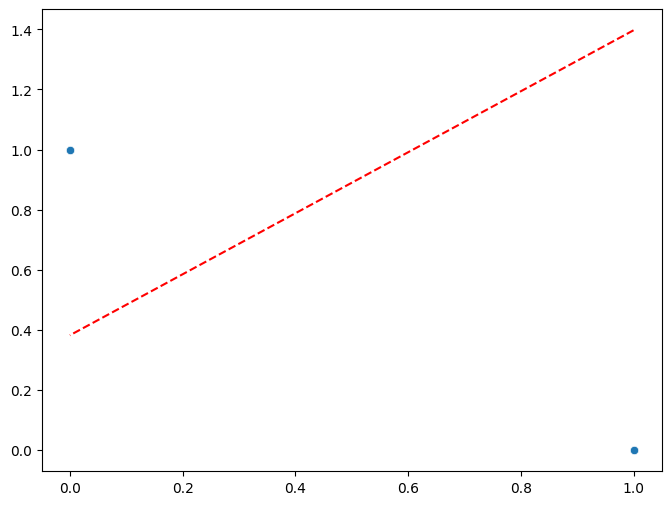

In [25]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot([x[0], x[-1]], [yhat[0], yhat[-1]], color='red',markerfacecolor='red',
             markersize=10,linestyle='dashed')

## Participation block

# Reinitialize, loop and plot

In [26]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.001

In [27]:
for i in range(0, 20):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  print('new bias =', bias)
  print('new MSE =', mse_loss_fxn(x, w, bias, y))
  print()

new w = [[1.19915]]
new bias = 0.499400425
new MSE = 1.5678367403789304

new w = [[1.19830072]]
new bias = 0.49880187421260624
new MSE = 1.5656783964128553

new w = [[1.19745217]]
new bias = 0.49820434625164967
new MSE = 1.5635249555281574

new w = [[1.19660435]]
new bias = 0.49760783973278394
new MSE = 1.5613764051839971

new w = [[1.19575724]]
new bias = 0.4970123532734833
new MSE = 1.5592327328722309

new w = [[1.19491085]]
new bias = 0.4964178854930401
new MSE = 1.5570939261173218

new w = [[1.19406519]]
new bias = 0.4958244350125623
new MSE = 1.5549599724762575

new w = [[1.19322025]]
new bias = 0.49523200045497123
new MSE = 1.5528308595384632

new w = [[1.19237602]]
new bias = 0.49464058044499915
new MSE = 1.5507065749257178

new w = [[1.19153251]]
new bias = 0.4940501736091869
new MSE = 1.5485871062920686

new w = [[1.19068972]]
new bias = 0.49346077857588155
new MSE = 1.5464724413237474

new w = [[1.18984764]]
new bias = 0.492872393975234
new MSE = 1.5443625677390864

new w = [

In [28]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.67133825],
       [0.48820153],
       [1.67133825],
       [0.48820153]])

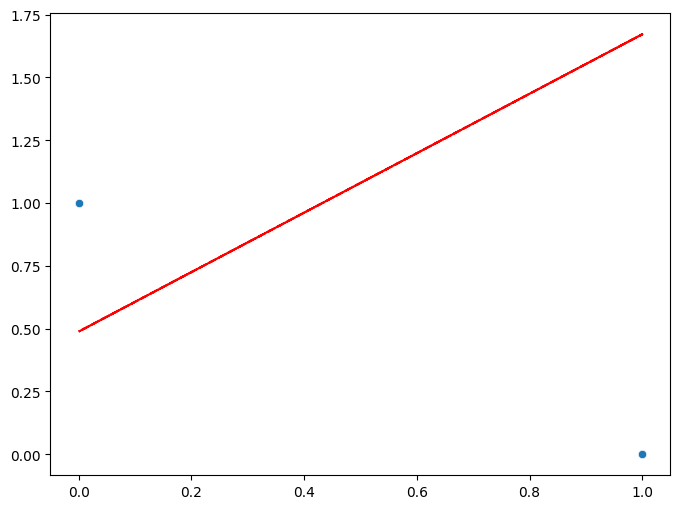

In [29]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

## Let's change our alpha

In [30]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

In [31]:
display(y)
yhat = x@w+bias
yhat

array([[0],
       [1],
       [0],
       [1]])

array([[1.7],
       [0.5],
       [1.7],
       [0.5]])

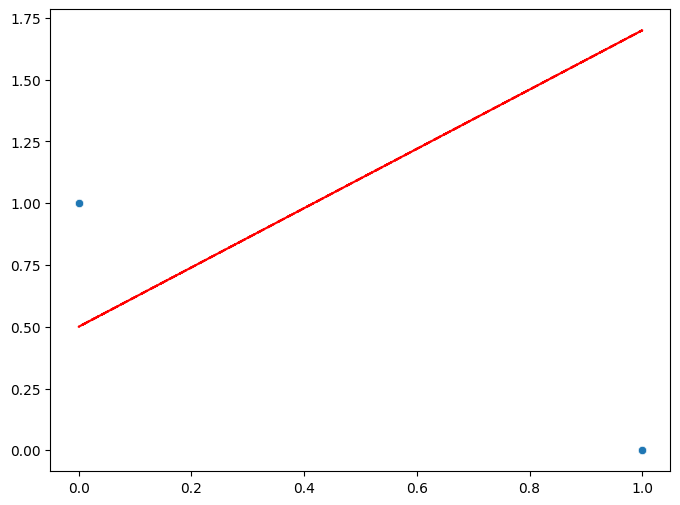

In [32]:
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

# Learning time!

In [34]:
# our variable init
x = np.array([[1],[0],[1],[0]])
bias = 0.5
w = np.array([[1.2]]) # needs to be n,1
#w = np.array([[-0.62]]) # needs to be n,1
y = np.array([[0],[1],[0],[1]])
mylr = 0.01
iterations = 100

weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
  weights.append(w[0][0])
  print('new w =', w)
  bias = gradient_descent_update_bias(x, w, bias, y, mylr)
  biases.append(bias)
  print('new bias =', bias)
  my_mse = mse_loss_fxn(x, w, bias, y)
  cost.append(my_mse)
  print('new MSE =', my_mse)
  print()

Starting MSE = 1.5699999999999998
new w = [[1.1915]]
new bias = 0.4940425
new MSE = 1.5485232555562498

new w = [[1.18307229]]
new bias = 0.4881867135625
new MSE = 1.5275297444031897

new w = [[1.17471599]]
new bias = 0.48243126646440154
new MSE = 1.5070072159046326

new w = [[1.16643026]]
new bias = 0.4767748025187581
new MSE = 1.4869437361389235

new w = [[1.15821423]]
new bias = 0.471215983339039
new MSE = 1.4673276796858534

new w = [[1.15006708]]
new bias = 0.46575348810647327
new MSE = 1.4481477216266692

new w = [[1.14198798]]
new bias = 0.4603860133404317
new MSE = 1.4293928297516472

new w = [[1.13397611]]
new bias = 0.455112272671809
new MSE = 1.4110522569698483

new w = [[1.12603067]]
new bias = 0.44993099661936536
new MSE = 1.3931155339158026

new w = [[1.11815086]]
new bias = 0.4448409323689903
new MSE = 1.375572461748021

new w = [[1.1103359]]
new bias = 0.4398408435558491
new MSE = 1.358413105134349

new w = [[1.10258501]]
new bias = 0.43492951004937547
new MSE = 1.34162

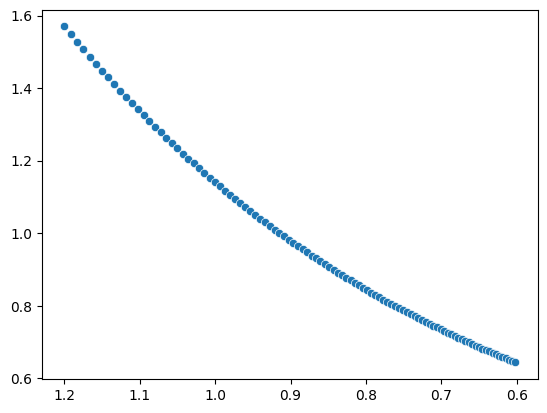

In [35]:
g = sns.scatterplot(y = cost, x = weights)
g.invert_xaxis()

array([[0.84367039],
       [0.24160902],
       [0.84367039],
       [0.24160902]])

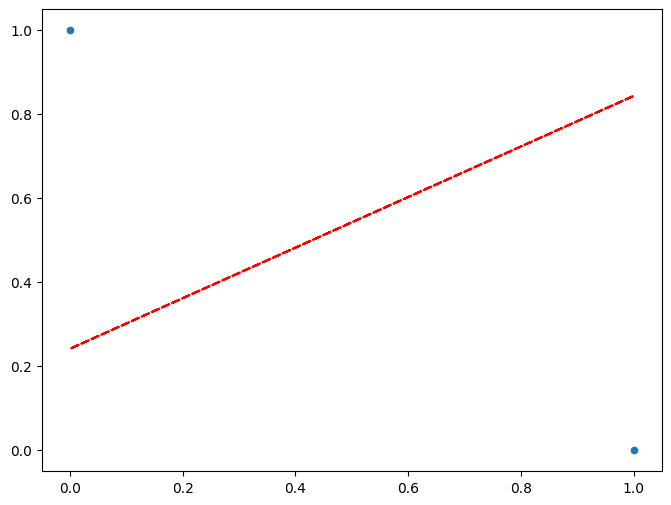

In [36]:
yhat = x@w+bias
display(yhat)
plt.figure(figsize = (8,6))
sns.scatterplot(x=x.squeeze(), y=y.squeeze())
plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead

In [37]:
cost

[1.5699999999999998,
 1.5485232555562498,
 1.5275297444031897,
 1.5070072159046326,
 1.4869437361389235,
 1.4673276796858534,
 1.4481477216266692,
 1.4293928297516472,
 1.4110522569698483,
 1.3931155339158026,
 1.375572461748021,
 1.358413105134349,
 1.3416277854193175,
 1.325207073968771,
 1.309141785687163,
 1.2934229727030555,
 1.278041918218436,
 1.26299013051762,
 1.2482593371315915,
 1.233841479153739,
 1.2197287057030781,
 1.2059133685311123,
 1.1923880167686205,
 1.1791453918087331,
 1.166178422322763,
 1.153480219405342,
 1.1410440718455153,
 1.1288634415205185,
 1.1169319589090578,
 1.1052434187209899,
 1.093791775640384,
 1.0825711401790215,
 1.0715757746374692,
 1.060800089170934,
 1.0502386379571804,
 1.0398861154638617,
 1.0297373528126879,
 1.019787314237914,
 1.010031093636705,
 1.0004639112089877,
 0.991081110184478,
 0.9818781536346086,
 0.9728506213671648,
 0.9639942069014749,
 0.9553047145220711,
 0.9467780564087811,
 0.9384102498412654,
 0.930197414476076,
 0.92213

In [38]:
weights

[1.2,
 1.1915,
 1.1830722875,
 1.1747159924946875,
 1.166430256199892,
 1.1582142309062988,
 1.150067079835072,
 1.1419879769953643,
 1.1339761070436853,
 1.126030665145108,
 1.1181508568362857,
 1.1103358978902593,
 1.1025850141830287,
 1.0948974415618666,
 1.0872724257153519,
 1.0797092220450997,
 1.0722070955391667,
 1.0647653206471088,
 1.0573831811566712,
 1.0500599700720865,
 1.0427949894939645,
 1.0355875505007484,
 1.0284369730317182,
 1.0213425857715241,
 1.0143037260362258,
 1.0073197396608191,
 1.0003899808882333,
 0.9935138122597754,
 0.9866906045070065,
 0.9799197364450288,
 0.9732005948671666,
 0.9665325744410217,
 0.9599150776058867,
 0.9533475144714968,
 0.9468293027181042,
 0.9403598674978568,
 0.9339386413374647,
 0.9275650640421371,
 0.9212385826007736,
 0.9149586510923935,
 0.9087247305937863,
 0.9025362890883685,
 0.8963928013762295,
 0.8902937489853524,
 0.8842386200839943,
 0.8782269093942096,
 0.8722581181065021,
 0.8663317537955932,
 0.8604473303372876,
 0.8546

In [39]:
biases

[0.5,
 0.4940425,
 0.4881867135625,
 0.48243126646440154,
 0.4767748025187581,
 0.471215983339039,
 0.46575348810647327,
 0.4603860133404317,
 0.455112272671809,
 0.44993099661936536,
 0.4448409323689903,
 0.4398408435558491,
 0.43492951004937547,
 0.43010572774107236,
 0.4253683083350849,
 0.42071607914150855,
 0.4161478828723976,
 0.4116625774404381,
 0.40725903576025035,
 0.4029361455522874,
 0.3986928091492947,
 0.39452794330529806,
 0.3904404790070865,
 0.386429361288158,
 0.3824935490450953,
 0.37863201485634024,
 0.37484374480333565,
 0.3711277382940034,
 0.36748300788852833,
 0.3639085791274179,
 0.3604034903618079,
 0.35696679258598474,
 0.35359754927209547,
 0.350294836207017,
 0.3470577413313563,
 0.34388536458055347,
 0.3407768177280606,
 0.33773122423056934,
 0.3347477190752598,
 0.3318254486290452,
 0.32896357048978586,
 0.3261612533394462,
 0.32341767679917055,
 0.3207320312862521,
 0.3181035178729696,
 0.31553134814726885,
 0.31301474407526364,
 0.31055293786553306,
 0.

# New dataset!

In [40]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
bias = np.random.randn()

# Hyperparameters
mylr = 0.01
iterations = 1000

<Axes: >

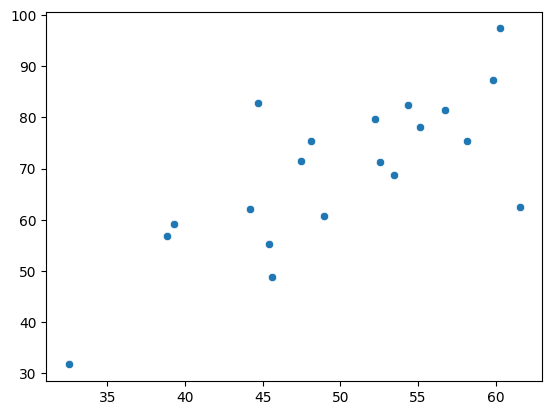

In [41]:
# plot me
sns.scatterplot(x=x.squeeze(), y=y.squeeze())

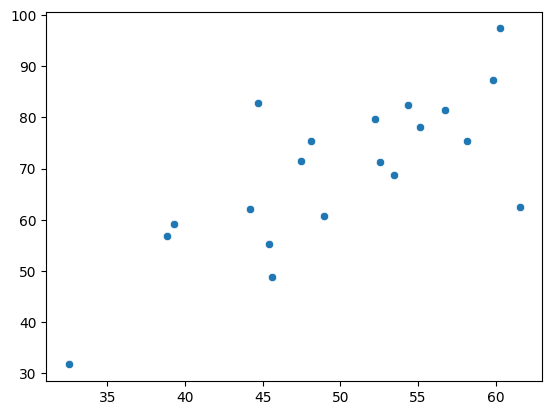

new MSE = nan
new MSE = nan
new MSE = nan
new MSE = nan
new MSE = nan


In [ ]:
weights = list()
cost = list()
biases  = list()
my_mse = mse_loss_fxn(x, w, bias, y)
print('Starting MSE =', my_mse)
cost.append(my_mse)
weights.append(w[0][0])
biases.append(bias)
for i in range(0, iterations):
  for j in range(0, 5):
    w = gradient_descent_update_dep_var(x, w, bias, y, mylr)
    #print('new w =', w)
    bias = gradient_descent_update_bias(x, w, bias, y, mylr)
    #print('new bias =', bias)
    print('new MSE =', mse_loss_fxn(x, w, bias, y))
    #print()
  yhat = x@w+bias
  clear_output(wait=True)
  plt.figure()
  sns.scatterplot(x=x.squeeze(), y=y.squeeze())
  plt.plot(x.squeeze(), yhat.squeeze(), color='red', linestyle='dashed') # use squeeze instead
  plt.show()

## Let's do it again

In [ ]:
# Dataset
x = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
              55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
              45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
              48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754]).reshape(-1, 1)

y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
              78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
              55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
              60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319]).reshape(-1, 1)

# Initialize parameters
w = np.random.randn(1, 1)
b = np.random.randn()

# Hyperparameters
learning_rate = 0.001
num_iterations = 1000

## Participation block

What would happen if we use large learning rate or low learning rate?

**Ans:** Using a large learning rate can cause the model to overshoot optimal points, leading to oscillations or even divergence, while a small learning rate results in slow convergence, potentially allowing the model to settle near the optimal point with higher precision. Large learning rates speed up initial training but can be unstable, whereas low rates are more precise but risk getting stuck in local minima. To balance these effects, adaptive learning rates or schedules that gradually decrease the learning rate during training are often used.